<a href="https://colab.research.google.com/github/SatyamVyas04/MasteringPython/blob/main/MLBasics/AIML_MiniProject_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation
> Performance Analysis of Logistic Regression Algorithm and Random Forest Algorithm for Predicting Product Review Analysis, by D. Venkata Bhargav and Dhanalakshmi R

## Data Preprocessing

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided file path
import pandas as pd

# List of file paths
file_paths = [
    "./amazon_books_Data.csv",
    "./amazon_ebook_Data.csv",
    "./amazon_jwellery_Data.csv",
    "./amazon_pc_Data.csv"
]

# Initialize an empty DataFrame
combined_df = pd.DataFrame()

# Read each file and append it to the combined DataFrame
for file_path in file_paths:
    temp_df = pd.read_csv(file_path)
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
    temp_df = None

# Display the first few rows of the final DataFrame
# print(combined_df.head())

# Save the combined DataFrame if needed
combined_df.to_csv("combined_amazon_data.csv", index=False)

# Display the first few rows of the dataset to understand its structure
df = combined_df
df.head()

,Unnamed: 0,market_place,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Sentiment,review_month,review_day,review_year
0,0,"""US""","""25933450""","""RJOVP071AVAJO""","""0439873800""","""84656342""","""There Was an Old Lady Who Swallowed a Shell!""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Five Stars""","""I love it and so does my students!""",31-08-2015,positive,August,Monday,2015.0
1,1,"""US""","""1801372""","""R1ORGBETCDW3AI""","""1623953553""","""729938122""","""I Saw a Friend""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Please buy ""I Saw a Friend""! Your children wi...","""My wife and I ordered 2 books and gave them a...",31-08-2015,positive,August,Monday,2015.0
2,2,"""US""","""5782091""","""R7TNRFQAOUTX5""","""142151981X""","""678139048""","""Black Lagoon, Vol. 6""","""Books""",1,0,0,0 \t(N),1 \t(Y),"""Shipped fast.""","""Great book just like all the others in the se...",31-08-2015,positive,August,Monday,2015.0
3,3,"""US""","""32715830""","""R2GANXKDIFZ6OI""","""014241543X""","""712432151""","""If I Stay""","""Books""",1,0,0,0 \t(N),0 \t(N),"""Five Stars""","""So beautiful""",31-08-2015,positive,August,Monday,2015.0
4,4,"""US""","""14005703""","""R2NYB6C3R8LVN6""","""1604600527""","""800572372""","""Stars 'N Strips Forever""","""Books""",1,2,2,0 \t(N),1 \t(Y),"""Five Stars""","""Enjoyed the author's story and his quilts are...",31-08-2015,positive,August,Monday,2015.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         400 non-null    int64  
 1   market_place       400 non-null    object 
 2   customer_id        400 non-null    object 
 3   review_id          400 non-null    object 
 4   product_id         400 non-null    object 
 5   product_parent     400 non-null    object 
 6   product_title      400 non-null    object 
 7   product_category   400 non-null    object 
 8   star_rating        400 non-null    int64  
 9   helpful_votes      400 non-null    int64  
 10  total_votes        400 non-null    int64  
 11  vine               400 non-null    object 
 12  verified_purchase  400 non-null    object 
 13  review_headline    400 non-null    object 
 14  review_body        400 non-null    object 
 15  review_date        400 non-null    object 
 16  Sentiment          400 non

In [71]:
df.describe()

,Unnamed: 0,star_rating,helpful_votes,total_votes,review_year
count,400.00000,400.000000,400.000000,400.000000,100.0
mean,49.50000,0.787500,0.832500,1.167500,2015.0
std,28.90222,0.409589,3.135926,4.079958,0.0
min,0.00000,0.000000,0.000000,0.000000,2015.0
25%,24.75000,1.000000,0.000000,0.000000,2015.0
50%,49.50000,1.000000,0.000000,0.000000,2015.0
75%,74.25000,1.000000,1.000000,1.000000,2015.0
max,99.00000,1.000000,36.000000,47.000000,2015.0


In [72]:
df = df.drop(['Unnamed: 0', 'market_place', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_date', 'review_month', 'review_day', 'review_year'], axis=1)

In [73]:
df.head()

,review_headline,review_body,Sentiment
0,"""Five Stars""","""I love it and so does my students!""",positive
1,"""Please buy ""I Saw a Friend""! Your children wi...","""My wife and I ordered 2 books and gave them a...",positive
2,"""Shipped fast.""","""Great book just like all the others in the se...",positive
3,"""Five Stars""","""So beautiful""",positive
4,"""Five Stars""","""Enjoyed the author's story and his quilts are...",positive


In [74]:
df['Sentiment'].unique()

array(['positive', 'negaitve'], dtype=object)

In [75]:
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negaitve': 0})

In [76]:
df['review_body'] = df['review_body'].str.lower()
df['review_headline'] = df['review_headline'].str.lower()

df['review'] = df['review_headline'] + ' ' + df['review_body']
df['review'] = df['review'].str.replace('[^\w\s]','')

In [77]:
df['review']

,review
0,"""five stars"" ""i love it and so does my students!"""
1,"""please buy ""i saw a friend""! your children wi..."
2,"""shipped fast."" ""great book just like all the ..."
3,"""five stars"" ""so beautiful"""
4,"""five stars"" ""enjoyed the author's story and h..."
...,...
395,"""nice cable, but wrong style"" ""i ordered the r..."
396,"""five stars"" ""works greater"""
397,"""seems like a decent keyboard"" ""i had to retur..."
398,"""disappointment"" ""cords don't last very long. ..."


In [78]:
df.isna().sum()

,0
review_headline,0
review_body,0
Sentiment,0
review,0


## Text encoding

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review_body'])

## Embedings using universal sentence encoder


In [80]:
import tensorflow as tf
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(df['review_body'])

In [81]:
y = df['Sentiment']

## Model Fitting/Training and Testing

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predictions and Accuracy

In [83]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.8375


In [84]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 7  9]
 [ 4 60]]


In [85]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.87      0.94      0.90        64

    accuracy                           0.84        80
   macro avg       0.75      0.69      0.71        80
weighted avg       0.82      0.84      0.83        80



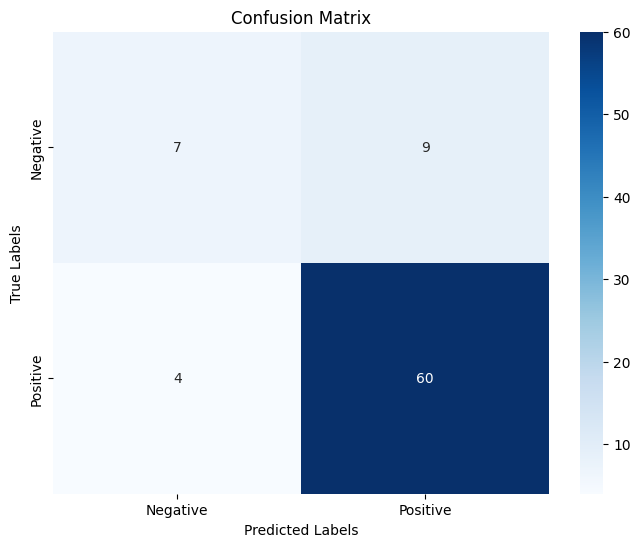

In [86]:
# Plot confusion matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()